In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
#Cargar datos
train_df = pd.read_parquet('proyecto_ML/train.parquet',engine='pyarrow')
test_df = pd.read_parquet('proyecto_ML/test.parquet', engine='pyarrow')

In [4]:
train_df.head(3)

,id,url,region,region_url,price,type,sqfeet,beds,baths,cats_allowed,...,wheelchair_access,electric_vehicle_charge,comes_furnished,laundry_options,parking_options,image_url,description,lat,long,state
0,7048013474,https://boise.craigslist.org/apa/d/very-nice-b...,boise,https://boise.craigslist.org,1350,house,1200,2,2.0,1,...,0,0,0,w/d in unit,detached garage,https://images.craigslist.org/00B0B_cPiJMEheZe...,Super cute row house in the Boise bench area. ...,43.5851,-116.2250,id
1,7043931179,https://cosprings.craigslist.org/apa/d/colorad...,colorado springs,https://cosprings.craigslist.org,1115,apartment,694,1,1.0,1,...,0,0,0,w/d in unit,carport,https://images.craigslist.org/00R0R_5XAoSKvfrz...,Windtree Apartment Homes currently has a spaci...,38.9137,-104.7800,co
2,7048254516,https://norfolk.craigslist.org/apa/d/virginia-...,norfolk / hampton roads,https://norfolk.craigslist.org,1129,apartment,900,2,2.0,0,...,0,0,0,w/d hookups,off-street parking,https://images.craigslist.org/00f0f_3ZbTFrsHpZ...,Call Today! show contact info Indian Lakes ...,36.7922,-76.1643,va


In [5]:
train_df.dtypes

id                           int64
url                         object
region                      object
region_url                  object
price                        int64
type                        object
sqfeet                       int64
beds                         int64
baths                      float64
cats_allowed                 int64
dogs_allowed                 int64
smoking_allowed              int64
wheelchair_access            int64
electric_vehicle_charge      int64
comes_furnished              int64
laundry_options             object
parking_options             object
image_url                   object
description                 object
lat                        float64
long                       float64
state                       object
dtype: object

In [6]:
#Crear la columna category_price: se debe crear una nueva columna en el dataframe llamada "category_price" y asignar las categorías "low","medium" y "high" según el rango de precios de cada propiedad.
train_df['category_price'] = np.where(train_df['price']<1000, 'low', np.where(train_df['price'].between(1000, 1999), 'medium', 'high'))

In [7]:
train_df.head(1)

,id,url,region,region_url,price,type,sqfeet,beds,baths,cats_allowed,...,electric_vehicle_charge,comes_furnished,laundry_options,parking_options,image_url,description,lat,long,state,category_price
0,7048013474,https://boise.craigslist.org/apa/d/very-nice-b...,boise,https://boise.craigslist.org,1350,house,1200,2,2.0,1,...,0,0,w/d in unit,detached garage,https://images.craigslist.org/00B0B_cPiJMEheZe...,Super cute row house in the Boise bench area. ...,43.5851,-116.225,id,medium


In [8]:
# Eliminar la columna price del dataset
train_df = train_df.drop('price',axis=1)

In [9]:
train_df.shape

(346479, 22)

In [10]:
#Buscar datos nulos
train_df.isnull().sum()

id                              0
url                             0
region                          0
region_url                      0
type                            0
sqfeet                          0
beds                            0
baths                           0
cats_allowed                    0
dogs_allowed                    0
smoking_allowed                 0
wheelchair_access               0
electric_vehicle_charge         0
comes_furnished                 0
laundry_options             71171
parking_options            126682
image_url                       0
description                     2
lat                          1722
long                         1722
state                           0
category_price                  0
dtype: int64

In [11]:
#Bucar datos repetidos
train_df.duplicated().sum()

0

In [12]:
#Describir variables numéricas
train_df.describe(include=[np.number])

,id,sqfeet,beds,baths,cats_allowed,dogs_allowed,smoking_allowed,wheelchair_access,electric_vehicle_charge,comes_furnished,lat,long
count,3.464790e+05,3.464790e+05,346479.000000,346479.000000,346479.000000,346479.000000,346479.000000,346479.00000,346479.000000,346479.000000,344757.000000,344757.000000
mean,7.040988e+09,1.066326e+03,1.903189,1.480339,0.726803,0.707861,0.731738,0.08197,0.012792,0.048141,37.234363,-92.705415
std,8.802214e+06,2.018537e+04,3.162685,0.608246,0.445602,0.454746,0.443055,0.27432,0.112374,0.214065,5.550956,16.551071
min,7.003808e+09,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,-43.533300,-163.894000
25%,7.035988e+09,7.500000e+02,1.000000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,33.453100,-100.784000
50%,7.043325e+09,9.490000e+02,2.000000,1.000000,1.000000,1.000000,1.000000,0.00000,0.000000,0.000000,37.650100,-87.710800
75%,7.048431e+09,1.150000e+03,2.000000,2.000000,1.000000,1.000000,1.000000,0.00000,0.000000,0.000000,41.137900,-81.174600
max,7.051292e+09,8.388607e+06,1100.000000,75.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,102.036000,172.633000


In [13]:
#Describir variables categóricas
train_df.describe(include=object)

,url,region,region_url,type,laundry_options,parking_options,image_url,description,state,category_price
count,346479,346479,346479,346479,275308,219797,346479,346477,346479,346479
unique,346479,404,413,12,5,7,168246,254990,51,3
top,https://boise.craigslist.org/apa/d/very-nice-b...,jacksonville,https://omaha.craigslist.org,apartment,w/d in unit,off-street parking,https://images.craigslist.org/00R0R_ciYsssEFRe...,***Special Move in Today!! $199 With Deposit**...,ca,low
freq,1,3849,2465,286303,118627,115612,363,467,29791,160654


Análisis univariado

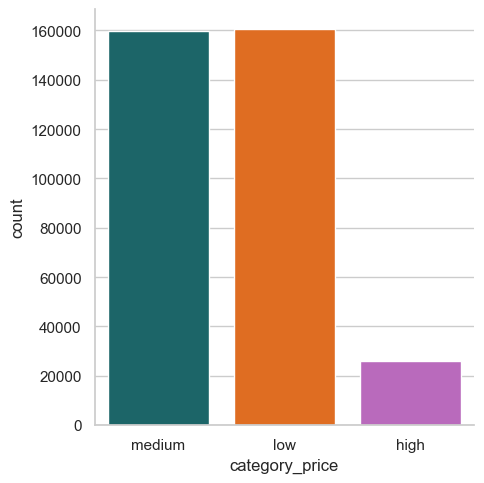

In [14]:
# Número de conteos de las categorías de precios
sns.catplot(data=train_df,x='category_price',kind='count',palette=price_color)

In [15]:
train_df.category_price.value_counts()

low       160654
medium    159804
high       26021
Name: category_price, dtype: int64

In [16]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 346479 entries, 0 to 346478
Data columns (total 22 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   id                       346479 non-null  int64  
 1   url                      346479 non-null  object 
 2   region                   346479 non-null  object 
 3   region_url               346479 non-null  object 
 4   type                     346479 non-null  object 
 5   sqfeet                   346479 non-null  int64  
 6   beds                     346479 non-null  int64  
 7   baths                    346479 non-null  float64
 8   cats_allowed             346479 non-null  int64  
 9   dogs_allowed             346479 non-null  int64  
 10  smoking_allowed          346479 non-null  int64  
 11  wheelchair_access        346479 non-null  int64  
 12  electric_vehicle_charge  346479 non-null  int64  
 13  comes_furnished          346479 non-null  int64  
 14  laun

In [17]:
train_df['category_price'] = train_df['category_price'].map({'low':1,'medium':0,'high':0})

In [18]:
data = train_df.copy()
for i, column in enumerate(list([str(d) for d in data.dtypes])):
    if column == "object":
        data[data.columns[i]] = data[data.columns[i]].fillna(data[data.columns[i]].mode())
        data[data.columns[i]] = data[data.columns[i]].astype("category").cat.codes
    else:
        data[data.columns[i]] = data[data.columns[i]].fillna(data[data.columns[i]].median())

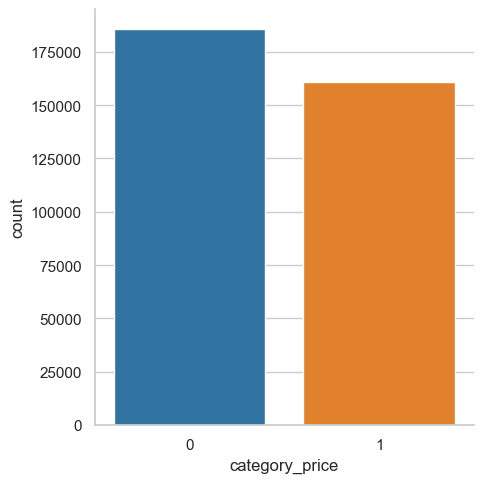

In [19]:
sns.catplot(data=data,x='category_price',kind='count')

In [20]:
data.category_price.value_counts()

0    185825
1    160654
Name: category_price, dtype: int64

In [21]:
#Contar nulos en el dataset data
data.isnull().sum()

id                         0
url                        0
region                     0
region_url                 0
type                       0
sqfeet                     0
beds                       0
baths                      0
cats_allowed               0
dogs_allowed               0
smoking_allowed            0
wheelchair_access          0
electric_vehicle_charge    0
comes_furnished            0
laundry_options            0
parking_options            0
image_url                  0
description                0
lat                        0
long                       0
state                      0
category_price             0
dtype: int64

In [22]:
data.head(3)

,id,url,region,region_url,type,sqfeet,beds,baths,cats_allowed,dogs_allowed,...,electric_vehicle_charge,comes_furnished,laundry_options,parking_options,image_url,description,lat,long,state,category_price
0,7048013474,38528,33,38,6,1200,2,2.0,1,1,...,0,0,4,2,27836,180263,43.5851,-116.2250,13,0
1,7043931179,76487,64,79,0,694,1,1.0,1,1,...,0,0,4,1,65486,245096,38.9137,-104.7800,5,0
2,7048254516,217648,236,251,0,900,2,2.0,0,0,...,0,0,3,4,99029,59958,36.7922,-76.1643,45,0


In [23]:
# Valor máximo de las variables originales
train_df.max(numeric_only=True)

id                         7.051292e+09
sqfeet                     8.388607e+06
beds                       1.100000e+03
baths                      7.500000e+01
cats_allowed               1.000000e+00
dogs_allowed               1.000000e+00
smoking_allowed            1.000000e+00
wheelchair_access          1.000000e+00
electric_vehicle_charge    1.000000e+00
comes_furnished            1.000000e+00
lat                        1.020360e+02
long                       1.726330e+02
category_price             1.000000e+00
dtype: float64

In [24]:
# Valores mínimos de las variables
train_df.min(numeric_only=True)

id                         7.003808e+09
sqfeet                     0.000000e+00
beds                       0.000000e+00
baths                      0.000000e+00
cats_allowed               0.000000e+00
dogs_allowed               0.000000e+00
smoking_allowed            0.000000e+00
wheelchair_access          0.000000e+00
electric_vehicle_charge    0.000000e+00
comes_furnished            0.000000e+00
lat                       -4.353330e+01
long                      -1.638940e+02
category_price             0.000000e+00
dtype: float64

<AxesSubplot: >

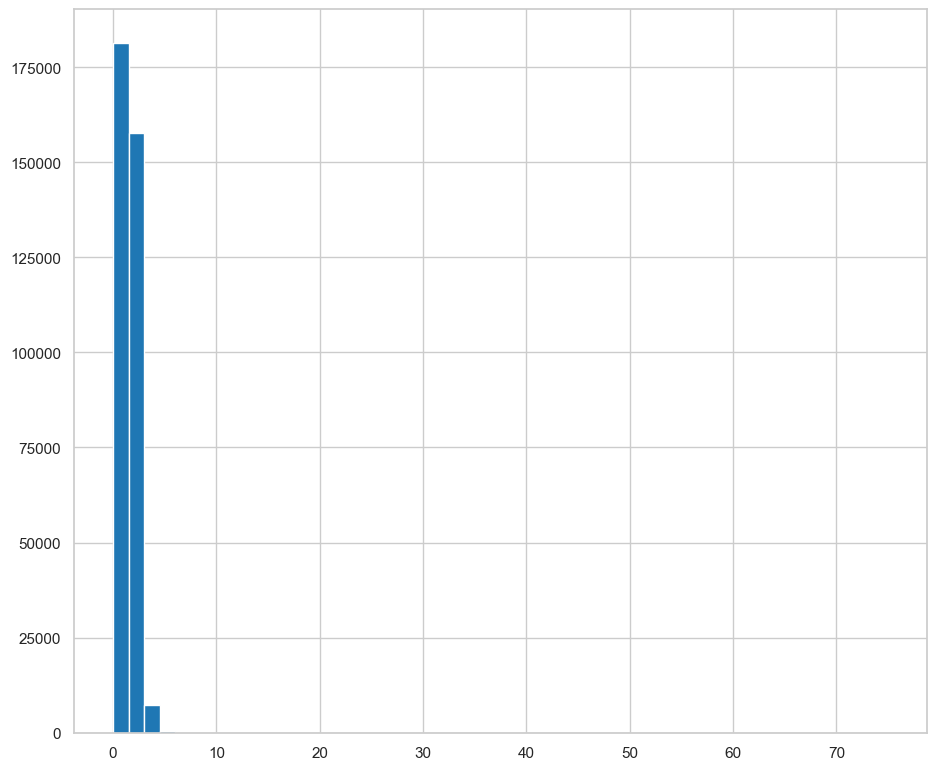

In [25]:
#OUTLIERS BATHS
data.baths.hist(bins=50)

<AxesSubplot: xlabel='baths'>

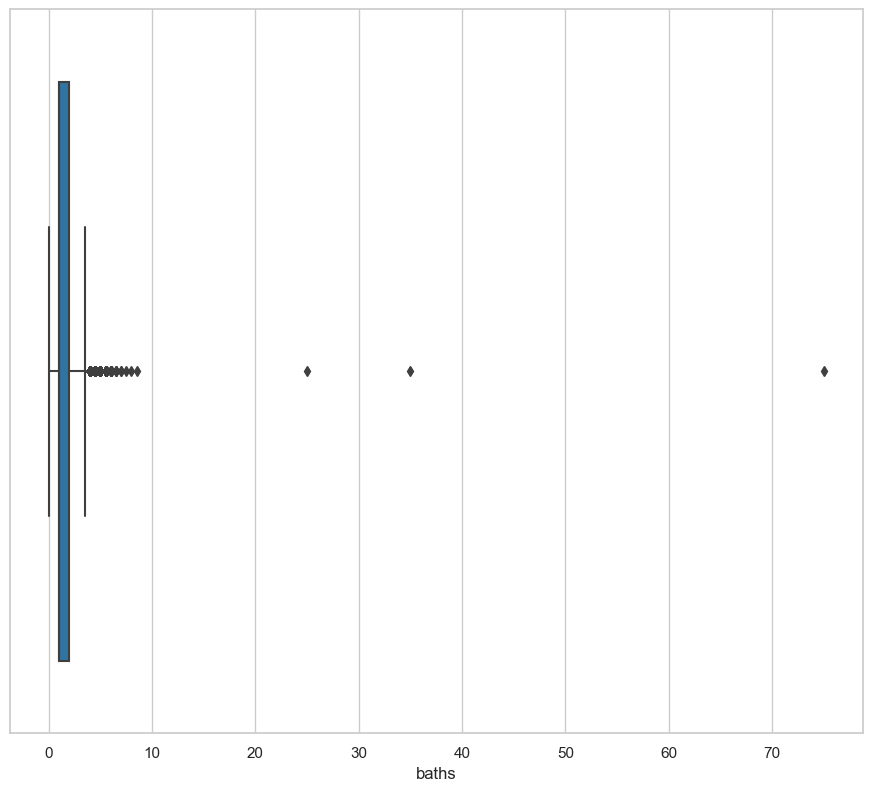

In [26]:
# Diagrama de caja 
sns.boxplot(data=train_df,x='baths')

In [27]:
Q1 = data.baths.quantile(0.25)
Q2 = data.baths.median()
Q3 = data.baths.quantile(0.75)
IRQ = Q3 -Q1
valor_minimo = data.baths.min()
valor_maximo = data.baths.max()
(Q1,Q2,Q3,IRQ,valor_minimo,valor_maximo)

(1.0, 1.0, 2.0, 1.0, 0.0, 75.0)

In [28]:
B1 = Q1 - 1.5*IRQ
B2 = Q3 + 1.5*IRQ
(B1,B2)

(-0.5, 3.5)

In [29]:
#Outliers variable baths
outlier_baths = data['baths']> 3.5
outlier_baths.sum()

1768

<AxesSubplot: >

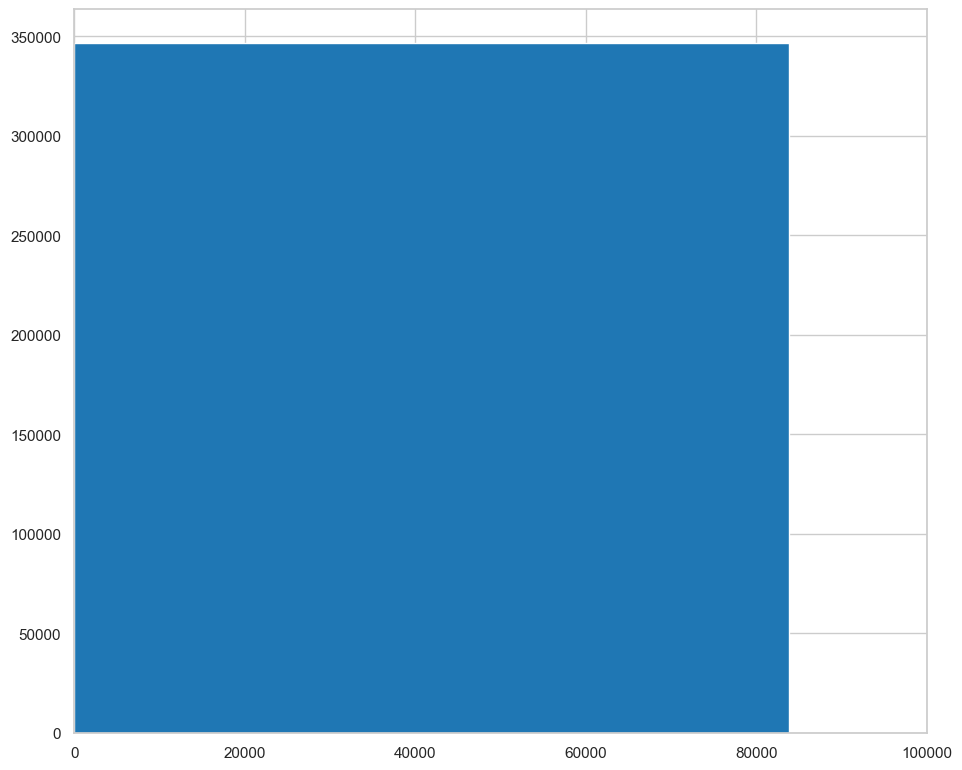

In [30]:
#OUTLIERS SQFEET
plt.xlim(0, 100000)
train_df.sqfeet.hist(bins=100)

<AxesSubplot: xlabel='sqfeet'>

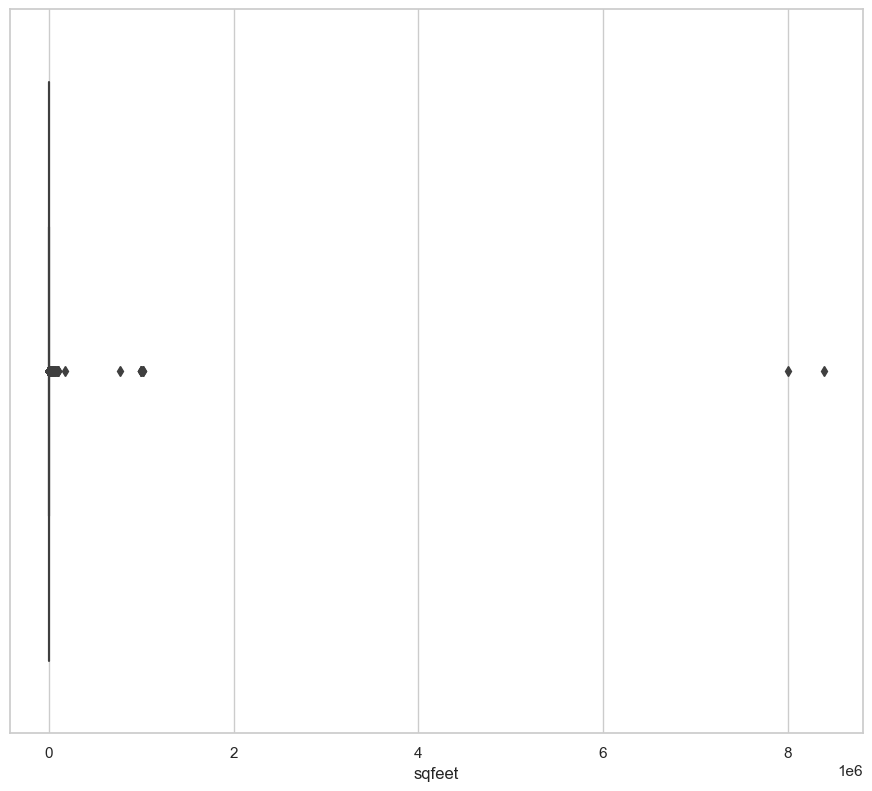

In [31]:
sns.boxplot(data=data,x='sqfeet')

In [32]:
Q1 = data.sqfeet.quantile(0.25)
Q2 = data.sqfeet.median()
Q3 = data.sqfeet.quantile(0.75)
IRQ = Q3 -Q1
valor_minimo = data.sqfeet.min()
valor_maximo = data.sqfeet.max()
(Q1,Q2,Q3,IRQ,valor_minimo,valor_maximo)

(750.0, 949.0, 1150.0, 400.0, 0, 8388607)

In [33]:
B1 = Q1 - 1.5*IRQ
B2 = Q3 + 1.5*IRQ
(B1,B2)

(150.0, 1750.0)

In [34]:
outlier1 = data['sqfeet']> 1750 
outlier2 = data['sqfeet']< 150 
outlier1.sum() + outlier2.sum()

14504

<AxesSubplot: >

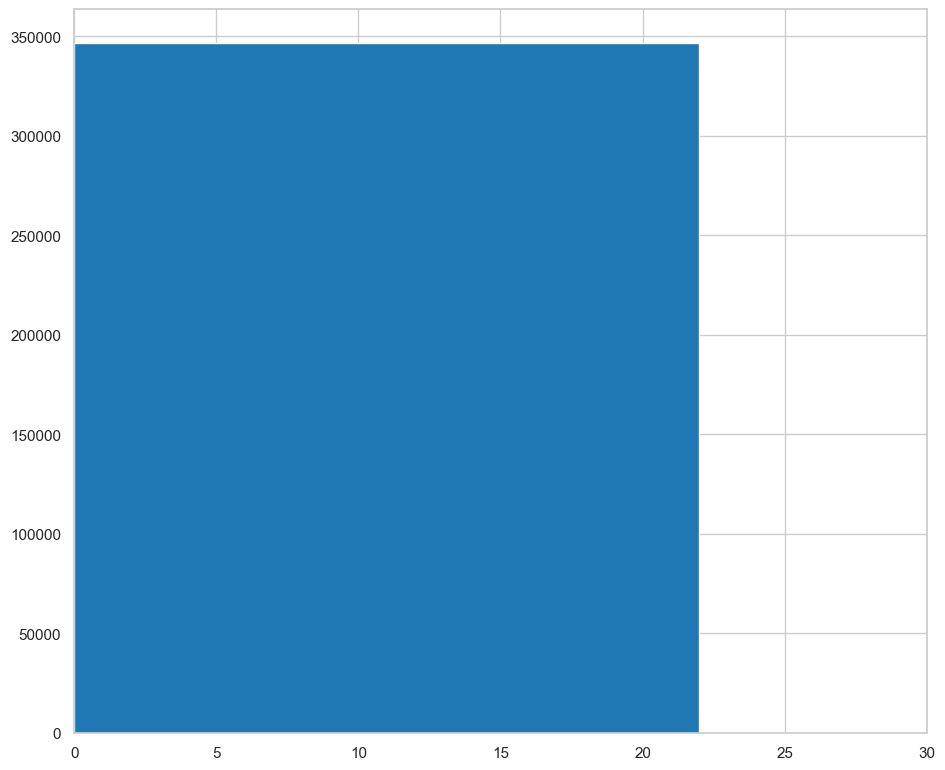

In [35]:
#OUTLIER BEDS
plt.xlim(0, 30)
train_df.beds.hist(bins=50)

<AxesSubplot: xlabel='beds'>

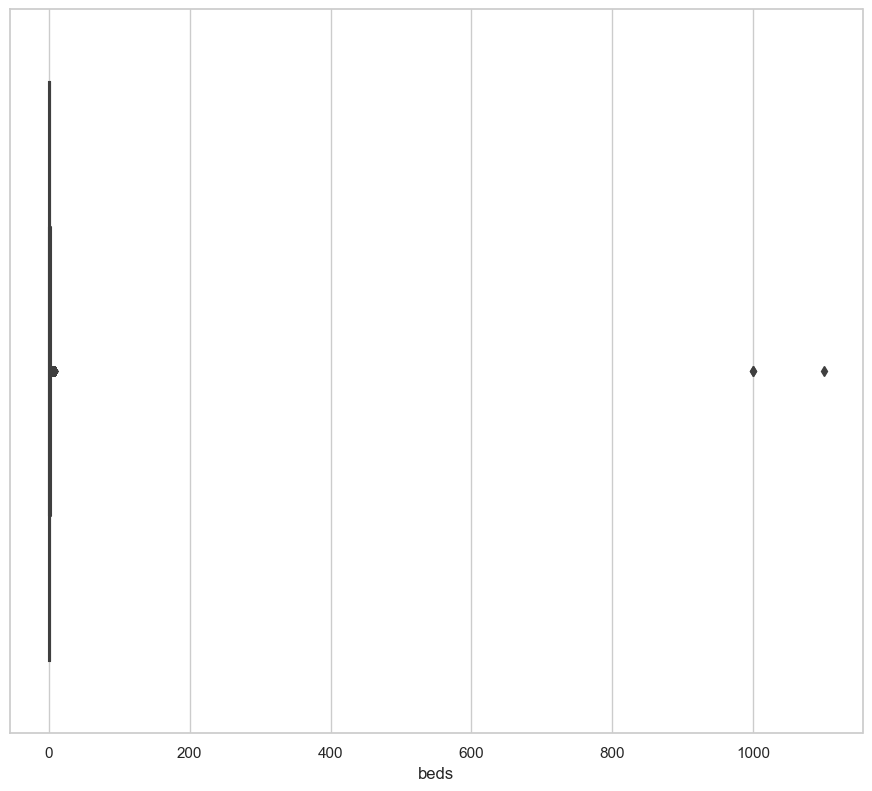

In [36]:
sns.boxplot(data=data,x='beds')

In [37]:
Q1 = data.beds.quantile(0.25)
Q2 = data.beds.median()
Q3 = data.beds.quantile(0.75)
IRQ = Q3 -Q1
valor_minimo = data.beds.min()
valor_maximo = data.beds.max()
(Q1,Q2,Q3,IRQ,valor_minimo,valor_maximo)

(1.0, 2.0, 2.0, 1.0, 0, 1100)

In [38]:
B1 = Q1 - 1.5*IRQ
B2 = Q3 + 1.5*IRQ
(B1,B2)

(-0.5, 3.5)

In [39]:
outlier_beds = train_df['beds']>3.5
outlier_beds.sum()

12792

In [40]:
#Eliminar columna id
data = data.drop('id',axis=1)

In [41]:
#Eliminar Outliers
data = data[data['baths']<=3.5]
data = data[data['sqfeet']<=1750]
data = data[data['sqfeet']>=150]
data = data[data['beds']<=3.5]

In [44]:
data = data[['region','type','sqfeet','beds','cats_allowed','smoking_allowed','wheelchair_access','electric_vehicle_charge','comes_furnished','laundry_options','parking_options','state','category_price']]
data.shape

(325527, 13)

In [43]:
data.to_csv('proyecto_ML/train_modificado.csv')